In [8]:
#HW10_Clustering
#Kushal Chandani (kc07535)
#kc07535@st.habib.edu.pk

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [10]:
Mac = pd.read_csv('McDonaldsMenu.csv')
Mac.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [13]:
#Question 1 and Question 2
Z = Mac.drop(['Category', 'Item', 'Serving Size'], axis=1)

In [14]:
Z.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,31,10,4,17,3,17,10,0,25,15
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,30,10,4,17,3,18,6,0,25,8
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,30,10,4,17,2,21,6,0,25,10


In [15]:
Z.tail()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
255,510,150,17.0,26,9.0,44,0.5,45,14,280,...,80,27,1,4,64,12,15,0,40,8
256,690,200,23.0,35,12.0,58,1.0,55,19,380,...,106,35,1,5,85,15,20,0,50,10
257,340,100,11.0,17,6.0,29,0.0,30,9,190,...,53,18,1,2,43,8,10,0,25,6
258,810,290,32.0,50,15.0,76,1.0,60,20,400,...,114,38,2,9,103,21,20,0,60,6
259,410,150,16.0,25,8.0,38,0.0,30,10,200,...,57,19,1,5,51,10,10,0,30,4


In [16]:
#Question 3
scaler = MinMaxScaler()
# transform data
XS = scaler.fit_transform(Z)
# XS.head()
XS[1:5]

array([[0.13297872, 0.06603774, 0.06779661, 0.06593407, 0.15      ,
        0.14705882, 0.        , 0.04347826, 0.04166667, 0.21388889,
        0.21333333, 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.0234375 , 0.20689655, 0.03529412, 0.        , 0.35714286,
        0.2       ],
       [0.19680851, 0.18867925, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.07826087, 0.078125  , 0.21666667,
        0.22      , 0.20567376, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.16091954, 0.04705882, 0.        , 0.35714286,
        0.25      ],
       [0.2393617 , 0.23584906, 0.23728814, 0.23626374, 0.5       ,
        0.50980392, 0.        , 0.49565217, 0.49479167, 0.23888889,
        0.24      , 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.24137931, 0.08823529, 0.        , 0.42857143,
        0.375     ],
       [0.21276596, 0.19811321, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.08695652, 0.0833333

In [17]:
#Question 4
wss = []
sil_scr_avg = []

for index in range(2, 15):
    kmeans = KMeans(n_clusters = index, max_iter = 300, random_state = 50)
    kmeans.fit(XS)
    wss.append(kmeans.inertia_)
    
    sil_scr_avg.append(silhouette_score(XS, kmeans.labels_))
    
print(sil_scr_avg)

C:\Users\Kushal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kushal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Kushal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kushal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

[0.3336826549063796, 0.36435579185509454, 0.3226082801739188, 0.2885682726386578, 0.2990187391413673, 0.27867731516689975, 0.29586102129992065, 0.2726778623563321, 0.30588221874356664, 0.28918514243162174, 0.2846824202029332, 0.27767336282326216, 0.2933986084993307]


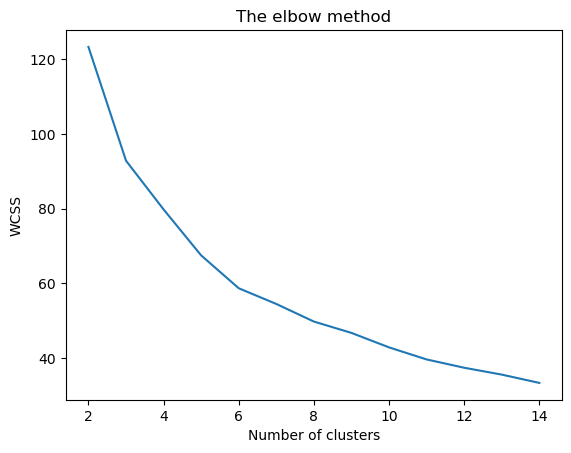

In [18]:
plt.plot(range(2, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [19]:
# Based on the visualization provided,
# beyond k=3, the plot exhibits less pronounced changes and tends to flatten.
# This notable shift in Within-Cluster Sum of Squares (WCSS)
# suggests that the optimal number of clusters for k-means clustering is 3.

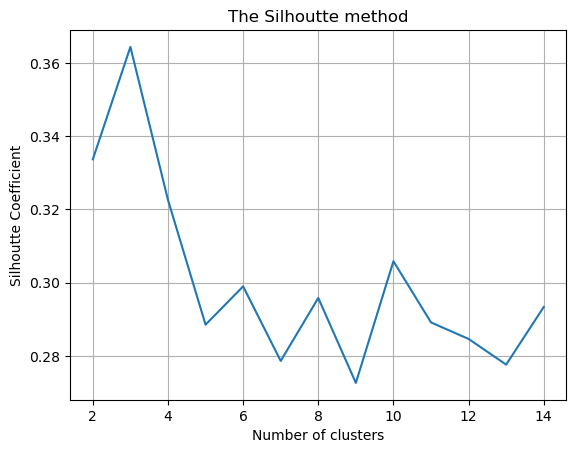

In [20]:
#Silhoutte Average Score Coefficient Plot

plt.plot(range(2, 15), sil_scr_avg)
plt.title('The Silhoutte method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Coefficient')
plt.grid()
plt.show()

In [21]:
# The Silhouette Average Plot further supports the determination of the number of clusters as 3,
# consistent with the finding from the Elbow Plot.
# This conclusion is drawn from the Silhouette Coefficient,
# which exhibits a value closest to 1 when the number of clusters is set to 3.
# Therefore, we will choose k = 3.

In [23]:
#Question 5

kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 99)
Res = kmeans.fit_predict(XS)

C:\Users\Kushal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kushal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [24]:
Res

#The provided array is the outcome of implementing k-means clustering on the given dataset with a value of k set to 3

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2])

In [25]:
#Question 6

In [26]:
score = silhouette_score(XS, kmeans.labels_, metric='euclidean')
score

0.364195243460364

#### Plotting any two features for visualization

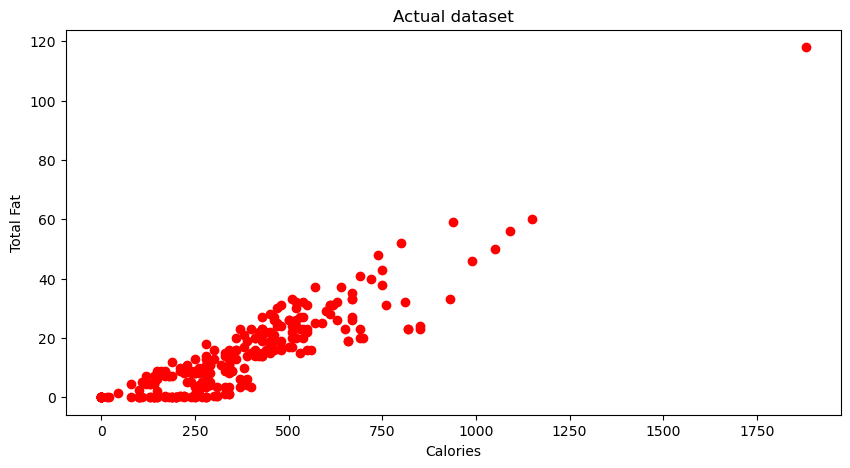

In [28]:
#Before Clustering

plt.figure(figsize=(10, 5))
plt.scatter(x=Mac['Calories'], y=Mac['Total Fat'], color='red')
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.title("Actual dataset")
plt.show()

#Strong correlation between the variables is shown below

Text(0.5, 1.0, 'Post-clustering dataset')

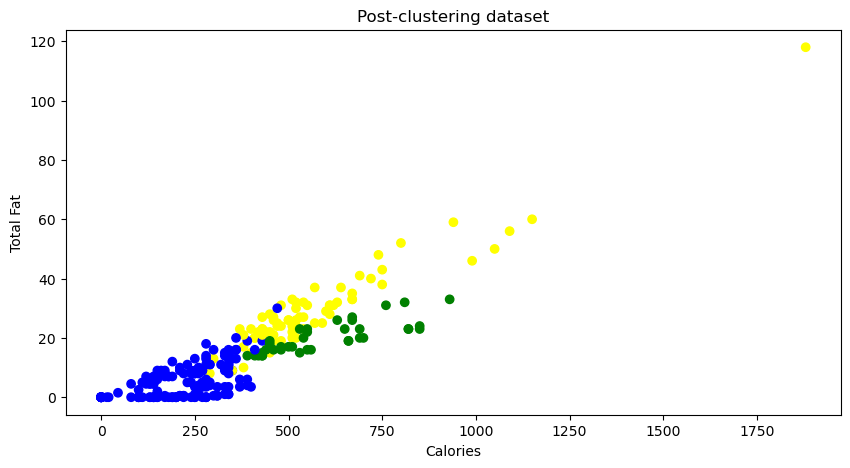

In [29]:
#After the clustering

plt.figure(figsize=(10, 5))
color2=np.array(['green','yellow','blue'])
plt.scatter(x=Mac['Calories'],y=Mac['Total Fat'],c=color2[kmeans.labels_])
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.title("Post-clustering dataset")

#Again strong correlation is shown between the variables (data is spreaded out) post-clustering as well.

In [5]:
#Another Visual (with centroids)

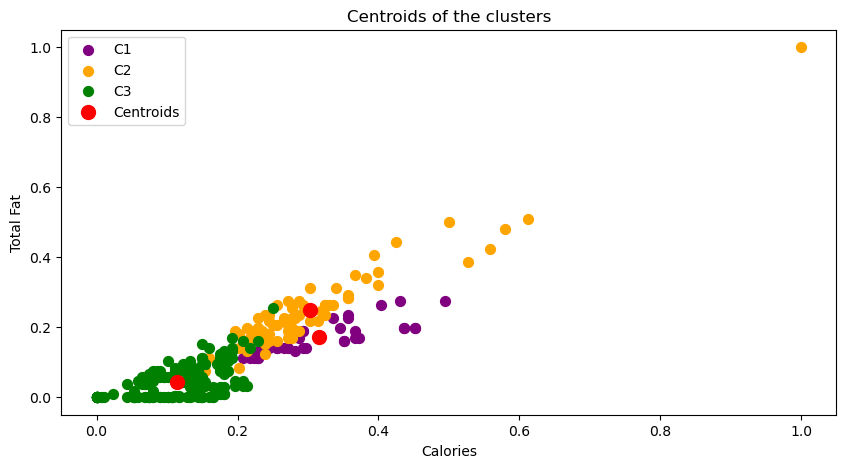

In [45]:
# Visualising the clusters
plt.figure(figsize=(10, 5))
plt.scatter(XS[Res == 0, 0], XS[Res == 0, 1], s=50, c='purple', label='C1')
plt.scatter(XS[Res == 1, 0], XS[Res == 1, 1], s=50, c='orange', label='C2')
plt.scatter(XS[Res == 2, 0], XS[Res == 2, 1], s=50, c='green', label='C3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.title("Centroids of the clusters")
plt.legend()
plt.show()

# The presented scatter plot depicts specific clusters, revealing three distinct clusters within the dataset.
# The values tightly encircle each cluster for every variable, indicating well-defined and concentrated groupings.
# Despite some outliers, the clusters remain clearly delineated.

In [56]:
#Question 7

C1 = Z.iloc[Res == 0, :]
C2 = Z.iloc[Res == 1, :]
C3 = Z.iloc[Res == 2, :]

In [57]:
C1

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
153,430,120,14.0,21,8.0,39,0.0,40,14,180,...,62,21,1,6,59,15,15,0,50,2
156,430,120,14.0,21,8.0,39,0.0,40,14,180,...,62,21,1,6,58,15,15,0,50,2
159,420,120,14.0,21,8.0,39,0.0,40,14,190,...,60,20,1,6,56,15,15,0,50,2
179,410,120,14.0,21,8.0,40,0.0,40,14,190,...,60,20,2,8,53,13,10,0,40,6
180,500,150,17.0,26,10.0,49,0.5,50,17,240,...,72,24,2,10,63,16,15,0,50,8
185,390,120,14.0,21,8.0,40,0.5,40,14,220,...,55,18,1,4,50,12,15,0,40,2
186,480,150,17.0,26,10.0,49,0.5,50,17,270,...,66,22,1,5,60,16,15,0,50,4
191,440,140,16.0,25,9.0,47,0.5,50,16,220,...,61,20,1,4,56,14,15,0,45,6
192,540,180,20.0,31,12.0,58,0.5,60,20,280,...,73,24,1,5,68,17,20,0,60,8
213,480,150,16.0,25,10.0,49,0.5,50,17,220,...,70,23,2,8,62,14,15,0,40,8


In [58]:
C2

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,31,10,4,17,3,17,10,0,25,15
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,30,10,4,17,2,21,6,0,25,10
5,430,210,23.0,36,9.0,46,1.0,300,100,960,...,31,10,4,18,3,26,15,2,30,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1880,1060,118.0,182,20.0,101,1.0,265,89,3600,...,118,39,6,24,1,87,0,15,8,25
85,380,190,21.0,33,6.0,29,0.0,70,23,860,...,22,7,2,10,5,25,100,25,15,8
88,450,190,22.0,33,4.5,22,0.0,50,17,850,...,42,14,7,28,12,23,170,30,15,15
89,290,80,8.0,13,2.5,13,0.0,70,23,680,...,28,9,7,28,10,27,170,30,15,15


In [59]:
C3

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,30,10,4,17,3,18,6,0,25,8
35,350,80,9.0,13,2.0,9,0.0,20,7,590,...,60,20,3,10,14,8,0,0,15,15
37,300,150,16.0,25,7.0,33,0.0,115,38,790,...,26,9,1,5,2,12,10,2,15,15
38,150,80,9.0,14,1.5,6,0.0,0,0,310,...,15,5,2,6,0,1,0,2,0,2
40,290,35,4.0,6,1.5,8,0.0,5,2,160,...,58,19,5,19,32,5,2,130,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,210,5,0.5,1,0.0,0,0.0,5,1,40,...,50,17,1,4,46,2,30,20,8,2
239,260,10,1.0,1,0.0,0,0.0,5,1,45,...,61,20,1,5,56,3,40,25,8,2
240,340,10,1.0,2,0.5,3,0.0,5,2,60,...,78,26,2,6,72,4,50,30,10,2
257,340,100,11.0,17,6.0,29,0.0,30,9,190,...,53,18,1,2,43,8,10,0,25,6


In [50]:
#Question 8

In [65]:
C1.describe()

# The data frame 'C1,' specific to the cluster, displays elevated levels of saturated fats, sodium, cholesterol, and carbohydrates.
# It predominantly consists of breakfast items, sweetened coffee, and tea, which are notably rich in sweetness, oiliness, and saltiness.
# These characteristics account for the observed high concentrations of saturated fats, sodium, cholesterol, and carbohydrates in the dataset.

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000
mean,593.243243,181.621622,20.216216,31.081081,12.378378,61.729730,0.770270,64.189189,21.405405,220.135135,...,89.972973,29.945946,0.891892,3.918919,78.378378,13.486486,19.054054,0.0,44.324324,4.405405
std,149.463003,47.755949,5.218211,8.101366,3.311188,16.992888,0.401293,18.047527,5.856902,68.814227,...,26.349664,8.787447,0.698561,2.994239,21.727289,3.556072,5.507298,0.0,12.481217,3.692782
min,390.000000,120.000000,14.000000,21.000000,8.000000,39.000000,0.000000,35.000000,11.000000,120.000000,...,55.000000,18.000000,0.000000,0.000000,50.000000,7.000000,10.000000,0.0,20.000000,0.000000
25%,460.000000,150.000000,16.000000,25.000000,10.000000,49.000000,0.500000,50.000000,17.000000,180.000000,...,65.000000,22.000000,0.000000,0.000000,59.000000,11.000000,15.000000,0.0,35.000000,2.000000
50%,550.000000,170.000000,19.000000,29.000000,12.000000,60.000000,1.000000,60.000000,21.000000,210.000000,...,86.000000,29.000000,1.000000,4.000000,71.000000,14.000000,20.000000,0.0,45.000000,4.000000
75%,690.000000,210.000000,23.000000,35.000000,15.000000,73.000000,1.000000,75.000000,25.000000,260.000000,...,109.000000,36.000000,1.000000,6.000000,93.000000,15.000000,20.000000,0.0,50.000000,8.000000
max,930.000000,290.000000,33.000000,50.000000,20.000000,102.000000,1.500000,95.000000,32.000000,400.000000,...,141.000000,47.000000,2.000000,10.000000,128.000000,21.000000,30.000000,0.0,70.000000,15.000000


In [66]:
C2.describe()

# The data frame 'C2,' specific to the cluster, exhibits a well-balanced calorie intake, yet it shows elevated levels of cholesterol, sodium, and proteins.
# This is evident due to the prevalence of snacks and side items in the dataset, which tend to be salty and oily.
# Given that these items are frequently consumed in substantial quantities during lunch or dinner, the high levels of cholesterol, sodium, and proteins are expected.

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,...,73.000000,73.000000,73.000000,73.000000,73.000000,73.00000,73.000000,73.000000,73.000000,73.000000
mean,568.219178,263.698630,29.315068,45.191781,10.136986,50.808219,0.328767,129.109589,43.041096,1285.342466,...,50.013699,16.671233,3.287671,13.178082,8.219178,26.39726,18.506849,9.561644,18.191781,19.191781
std,232.816943,135.610828,15.114265,23.301560,4.277087,21.422767,0.560377,133.732066,44.644409,463.255636,...,20.152539,6.733116,1.327900,5.510955,5.632856,11.22465,32.780466,11.350460,7.711207,6.785723
min,290.000000,80.000000,8.000000,13.000000,2.000000,9.000000,0.000000,0.000000,0.000000,290.000000,...,22.000000,7.000000,2.000000,6.000000,0.000000,6.00000,0.000000,0.000000,2.000000,8.000000
25%,440.000000,190.000000,22.000000,33.000000,7.000000,36.000000,0.000000,50.000000,17.000000,1030.000000,...,39.000000,13.000000,2.000000,9.000000,3.000000,20.00000,4.000000,2.000000,15.000000,15.000000
50%,510.000000,230.000000,26.000000,40.000000,10.000000,48.000000,0.000000,80.000000,27.000000,1260.000000,...,45.000000,15.000000,3.000000,12.000000,7.000000,25.00000,8.000000,8.000000,20.000000,20.000000
75%,610.000000,290.000000,32.000000,49.000000,13.000000,64.000000,0.500000,135.000000,44.000000,1470.000000,...,56.000000,19.000000,4.000000,15.000000,12.000000,32.00000,15.000000,15.000000,25.000000,20.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,101.000000,2.500000,575.000000,192.000000,3600.000000,...,118.000000,39.000000,7.000000,28.000000,32.000000,87.00000,170.000000,70.000000,30.000000,40.000000


In [67]:
C3.describe()

# The data frame 'C3,' tailored to the cluster, registers a notably high sodium intake and comparatively lower calorie consumption.
# It also features substantial levels of carbohydrates.
# While this pattern is expected for items like fish in the dataset, it is peculiar to observe similar values for chicken, as one would anticipate a higher protein content.
# This anomaly is likely attributed to the fact that chicken items in this dataset are predominantly fried and oily or are present in smaller quantities.

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,215.466667,47.166667,5.300000,8.153333,2.426667,11.986667,0.003333,16.566667,5.653333,179.466667,...,35.533333,11.853333,1.006667,3.940000,27.666667,6.946667,9.566667,10.140000,16.566667,2.980000
std,114.445478,51.716888,5.759439,8.796534,2.529946,12.378259,0.040825,17.856030,6.035673,221.134314,...,20.694864,6.922763,1.195611,4.712158,21.951339,6.190257,21.678374,33.511899,16.685973,4.111647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,...,21.250000,7.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,240.000000,35.000000,4.000000,6.000000,2.000000,10.500000,0.000000,10.000000,3.000000,125.000000,...,37.500000,12.500000,1.000000,3.000000,27.500000,6.500000,4.000000,0.000000,10.000000,2.000000
75%,297.500000,80.000000,9.000000,14.000000,4.500000,22.000000,0.000000,28.750000,9.000000,180.000000,...,50.000000,17.000000,1.000000,6.000000,45.000000,12.000000,10.000000,2.000000,30.000000,5.500000
max,470.000000,270.000000,30.000000,45.000000,8.000000,39.000000,0.500000,115.000000,38.000000,990.000000,...,79.000000,26.000000,6.000000,23.000000,76.000000,29.000000,170.000000,240.000000,60.000000,15.000000


In [68]:
#Assuming that the clusters formed are of food items

calories = [C1['Calories'].mean(), C2['Calories'].mean(), C3['Calories'].mean()]
print("Mean Calories = ", calories)

# The output [593.24, 568.22, 215.47] provides insights into the caloric distribution across three clusters in the dataset.
# Cluster 1 (C1) exhibits the highest average calorie content at approximately 593.24,
# followed closely by Cluster 2 (C2) with a mean value of around 568.22.
# In contrast, items in Cluster 3 (C3) have a significantly lower average calorie content, approximately 215.47.
# This variation suggests distinct caloric profiles among the clusters,
# offering valuable information for dietary analysis.
# The lower average calorie content in Cluster 3 indicates a potential subgroup of items
# that are comparatively lower in calories compared to those in Clusters 1 and 2.

Mean Calories =  [593.2432432432432, 568.2191780821918, 215.46666666666667]


In [69]:
TotalFat = [C1['Total Fat'].mean(), C2['Total Fat'].mean(), C3['Total Fat'].mean()]
print("Total Mean Fat = ", TotalFat)

# The output [20.22, 29.32, 5.3] provides insights into the mean Total Fat content across three clusters in the dataset.
# Cluster 1 (C1) exhibits a relatively lower average Total Fat content at approximately 20.22,
# while Cluster 2 (C2) stands out with a notably higher mean Total Fat value of around 29.32.
# In contrast, Cluster 3 (C3) has the lowest mean Total Fat content among the clusters, with a value of 5.3.
# These variations highlight distinct Total Fat profiles within the dataset,
# offering valuable information for dietary analysis or menu planning.
# The higher mean Total Fat content in Cluster 2 suggests a potential subgroup of items with an emphasis on Total Fat
# compared to Clusters 1 and 3.

Total Mean Fat =  [20.216216216216218, 29.315068493150687, 5.3]


In [70]:
Carbohydrates = [C1['Carbohydrates'].mean(), C2['Carbohydrates'].mean(), C3['Carbohydrates'].mean()]
print("Total Mean Carbohydrates = ", Carbohydrates)

# The output "Total Mean Carbohydrates = [89.97, 50.01, 35.53]" unveils distinct carbohydrate profiles across 
#three clusters (C1, C2, and C3) in the dataset. Cluster 1 boasts the highest mean carbohydrate content at 89.97, 
#suggesting a focus on items rich in carbohydrates like grains or sugars. Cluster 2 falls in the middle with a mean 
#carbohydrate value of 50.01, indicating a balanced or intermediate level of carbohydrate content in its items. 
#Cluster 3 exhibits the lowest mean carbohydrate content at 35.53, implying a focus on items that are less reliant on carbohydrates. 
#This analysis provides valuable insights for dietary understanding and menu planning, highlighting the diversity in carbohydrate emphasis 
#among the different clusters.

Total Mean Carbohydrates =  [89.97297297297297, 50.013698630136986, 35.53333333333333]


<Axes: xlabel='Calories', ylabel='Count'>

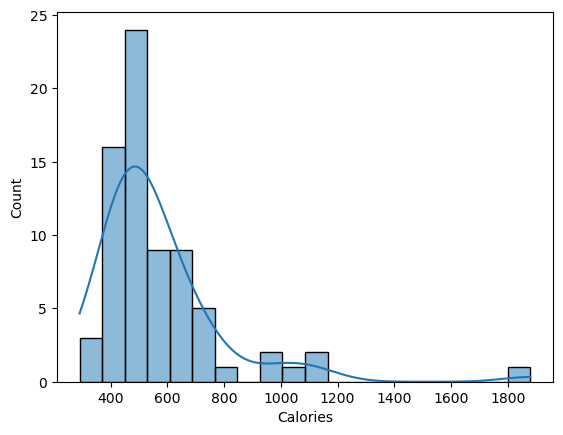

In [44]:
sns.histplot(C2['Calories'], kde=True)

<Axes: xlabel='Cholesterol', ylabel='Count'>

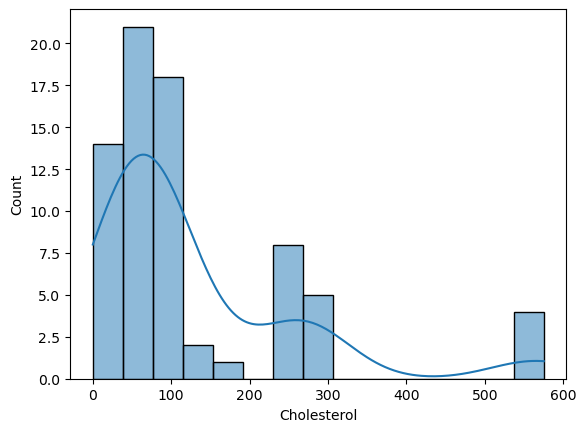

In [61]:
sns.histplot(C2['Cholesterol'], kde=True)

<Axes: xlabel='Protein', ylabel='Count'>

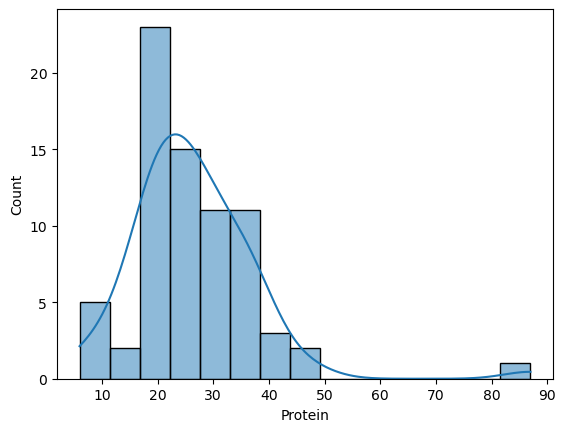

In [64]:
sns.histplot(C2['Protein'], kde=True)

<Axes: xlabel='Calories', ylabel='Count'>

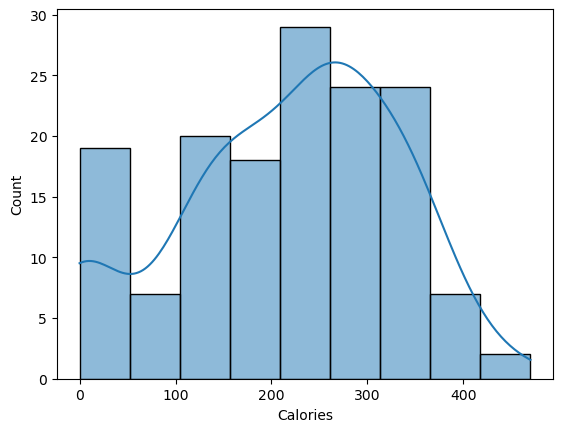

In [71]:
sns.histplot(C3['Calories'], kde=True)

<Axes: xlabel='Cholesterol', ylabel='Count'>

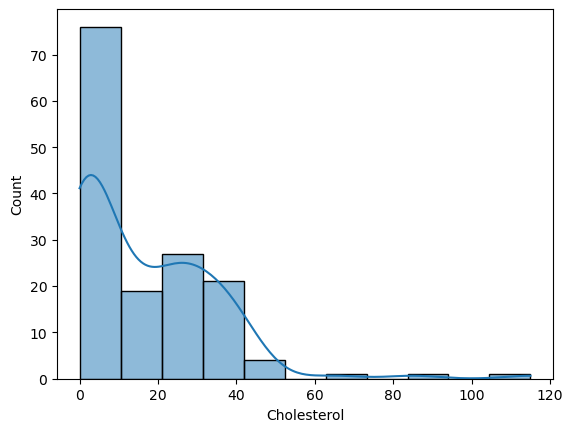

In [72]:
sns.histplot(C3['Cholesterol'], kde=True)

<Axes: xlabel='Protein', ylabel='Count'>

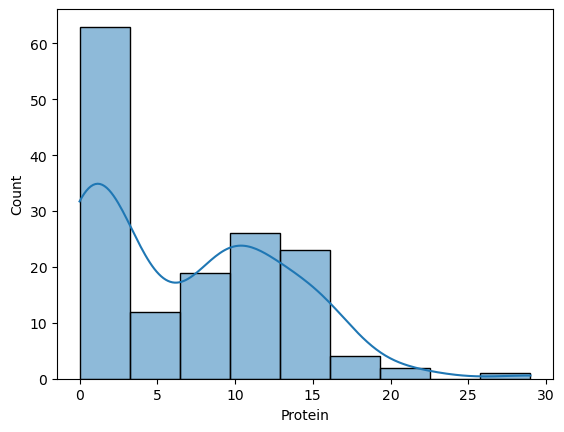

In [73]:
sns.histplot(C3['Protein'], kde=True)

In [ ]:
#Question 9

#Cluster 1: Caloric Beasters (High Calories)
#Cluster 2: Na (Sodium) Masters (Immense Sodium)
#Cluster 3: Low Fat Myths (Low Fat)